In [1]:
#Lending Club dataset resources

#https://www.kaggle.com/janiobachmann/lending-club-risk-analysis-and-metrics ..... data visualization, exploratory data
#https://www.kaggle.com/erykwalczak/initial-loan-book-analysis

# Part 1: Techniques for imputation
## 1.1Complete-Case-Analysis

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to show all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

In [5]:
# let's load the House Prices dataset
# and explore its shape (rows and columns)

data = pd.read_csv('https://raw.githubusercontent.com/anash963/DataSets/master/houseprice.csv')
data.shape

(1460, 81)

In [6]:
# let's check the column names
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# find the variables with missing observations

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
# let's find out whether they are numerical or categorical
data[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [11]:
# let's have a look at the values of the variables with
# missing data

data[vars_with_na].head(10)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [15]:
# let's find out the percentage of observations missing per variable

# calculate the percentage of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas
data_na = data[vars_with_na].isnull().mean()

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# add column names to the dataframe
data_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
data_na

,variable,na_percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


The first 6 variables contain a lot of missing information. So we can't use CCA if we consider those variables, as most of the observations in the dataset will be discarded. We could otherwise use CCA if we omit using those variables with a lot of NA.

For this demo, we will ignore the first 6 variables with a lot of missing data, and proceed with CCA in the remaining of the dataset.

In [18]:
# capture variables with no or less than 5% NA

vars_cca = [var for var in data.columns if data[var].isnull().mean() < 0.05]
vars_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [21]:
# calculate percentage of observations with complete
# cases: i.e., with values for all the variables

# the method dropna(), discards the observations that contain
# na in any of the rows / columns

len(data[vars_cca].dropna()) / len(data)

0.9671232876712329

In [22]:
# create the complete case dataset
# in other words, remove observations with na in any variable

data_cca = data[vars_cca].dropna()
data.shape, data_cca.shape

((1460, 81), (1412, 70))

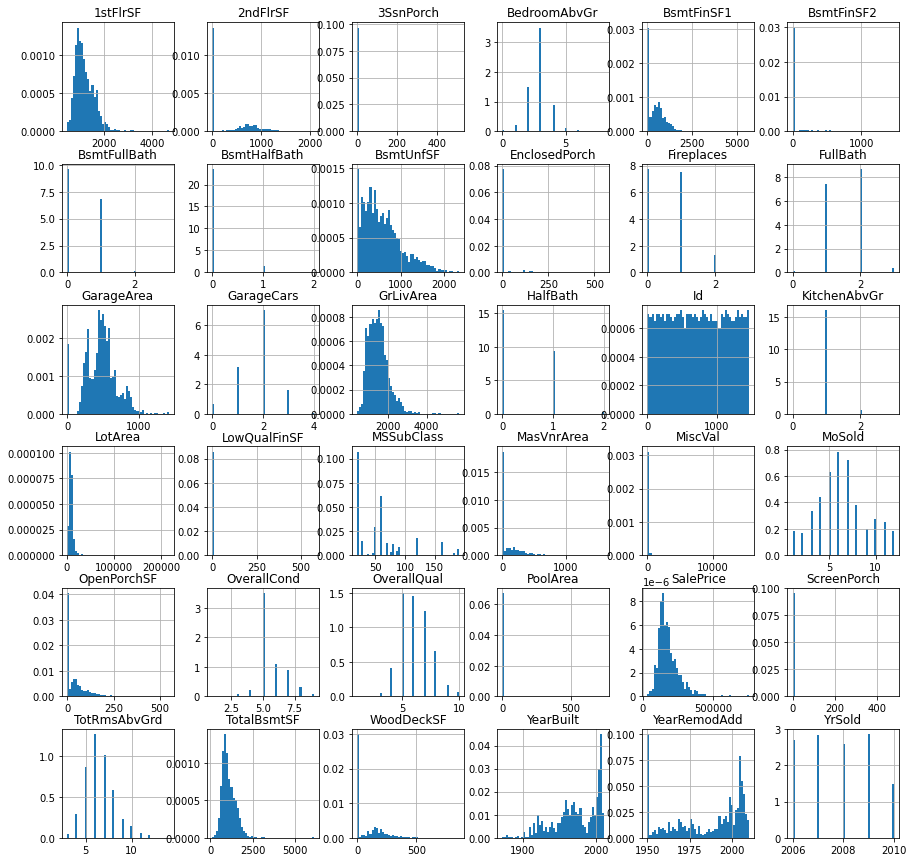

In [24]:
# plot the histograms for all numerival variables in the complete
# case dataset (as we did in section 3)

data_cca.hist(bins=50, density=True, figsize=(15, 15))
plt.show()

<AxesSubplot:>

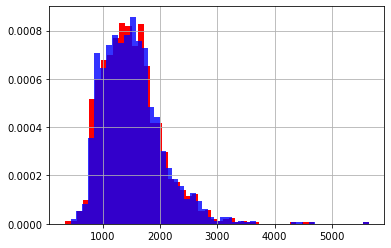

In [25]:
## let's check the distribution of a few variables before and after 
# cca: histogram

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

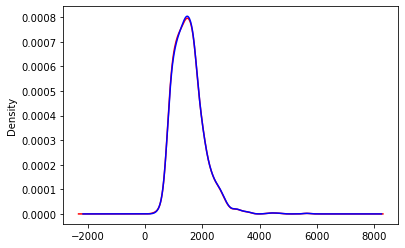

In [26]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GrLivArea'].plot.density(color='red')

# data after cca
data_cca['GrLivArea'].plot.density(color='blue')

<AxesSubplot:>

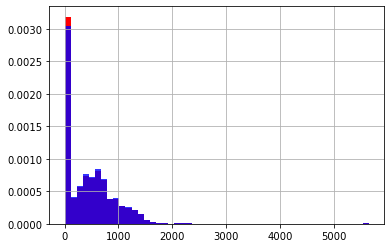

In [27]:
## let's check the distribution of a few variables before and after 
# cca: histogram

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['BsmtFinSF1'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
data_cca['BsmtFinSF1'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

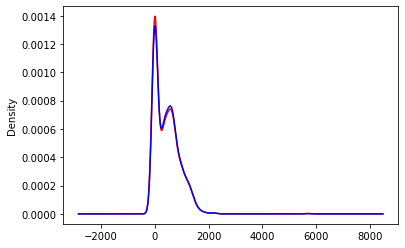

In [30]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['BsmtFinSF1'].plot.density(color='red')

# data after cca
data_cca['BsmtFinSF1'].plot.density(color='blue')

As we can see from the above plots, the distribution of the selected numerical variables in the original and complete case dataset is very similar, which is what we expect from CCA if data is missing at random and only for a small proportion of the observations.

In the next cells we shall explore the distribution of categorical variables. To do so, we shall evaluate the percentage of observations that show each of the unique categories.

In [31]:
# the following function captures the percentage of observations
# for each category in the original and complete case dataset
# and puts them together in a new dataframe


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [32]:
# run the function in a categorical variable
categorical_distribution(data, data_cca, 'BsmtQual')

,original,cca
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788


In [33]:
categorical_distribution(data, data_cca, 'MasVnrType')

,original,cca
None,0.591781,0.588527
BrkFace,0.304795,0.310198
Stone,0.087671,0.090652
BrkCmn,0.010274,0.010623


In [34]:
categorical_distribution(data, data_cca, 'SaleCondition')

,original,cca
Normal,0.820548,0.820822
Partial,0.085616,0.086402
Abnorml,0.069178,0.070822
Family,0.013699,0.014164
Alloca,0.008219,0.005666
AdjLand,0.002740,0.002125


#### As we can see from the output of the cells above, the distribution of houses in each of the categories, is very similar in the original and complete case dataset, which again, is what is expected if the data is missing completely at random, and the percentage of missing data is small.

## 1.2Mean-Median-Imputation

Mean / Median imputation
Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can be used to train machine learning models.

Mean / median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

Note the following:

1. If a variable is normally distributed, the mean, median and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for numerical variables.

2. If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

3. For discrete variables casted as 'int' (to save memory), the mean may not be an integer, therefore the whole variable will be re-casted as 'float'. In order to avoid this behaviour, we can replace NA with the median instead. The median will inevitably be an integer / discrete value as well.

### Which variables can I impute with Mean / Median Imputation?¶
The mean and median can only be calculated on numerical variables, therefore these methods are suitable for continuous and discrete numerical variables only.

### Assumptions
Data is missing completely at random (MCAR)

The missing observations, most likely look like the majority of the observations in the variable (aka, the mean / median)
If data is missing completely at random, then it is fair to assume that the missing values, are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent / average observation.

### Advantages

1. Easy to implement
2. Fast way of obtaining complete datasets
3. Can be integrated in production (during model deployment)

### Limitations
1. Distortion of the original variable distribution
2. Distortion of the original variance
3. Distortion of the covariance with the remaining variables of the dataset

   When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations, leading to underestimation of the variance.

    In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. Mean / median imputation may alter intrinsic correlations since the mean / median value that now replaces the missing data will not necessarily preserve the relation with the remaining variables.

    Finally, concentrating all missing values at the mean / median value, may lead to observations that are common occurrences in the distribution, to be picked up as outliers.

### When to use mean / median imputation?
    1. Data is missing completely at random
    
    2. No more than 5% of the variable contains missing data
    
    3. Although in theory, the above conditions should be met to minimise the impact of this imputation technique, in practice, mean / median imputation is very commonly used, even in those cases when data is not MCAR and there are a lot of missing values. The reason behind this, is the simplicity of the technique.



In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

## House Prices Dataset
In this dataset, there are variables with a lot or with few missing data. Therefore we can compare the effect of mean / median imputation.

In [36]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [37]:
# let's load the House Prices dataset

data = pd.read_csv('https://raw.githubusercontent.com/anash963/DataSets/master/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [57]:
# print the variables that contain missing data

# in the next list comprehension, we loop over all the columns
# of the dataset and select those that contain missing data

[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [39]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

### Remember that the mean and the median that we will use to replace the NA needs to be calculated in the train set and propagated to the test set.

In [40]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

C:\Users\anash\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\anash\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\anash\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\anash\Anaconda3\lib\site-packages\pandas\plotting\_matpl

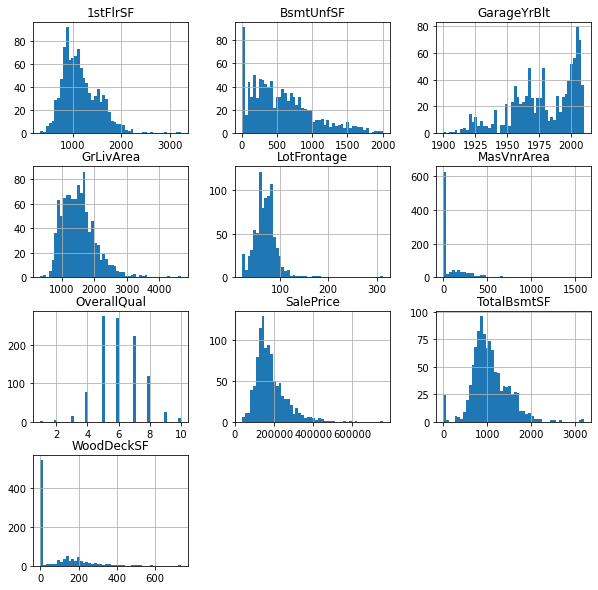

In [41]:
# let's plot the distributions of the variables

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [43]:
# let's make a function to fill missing values with the mean or median:
# the variable takes the dataframe, the variable, and the value of the
# mean or median
# and returns the variable with the filled na


def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [44]:
# create a new variable with the missing values replaced
# by the median using the function we created above

# let's repeat the following lines for each of the variables with NA
# over the next cells

median = X_train['LotFrontage'].median()

X_train.loc[:,'LotFrontage_median'] = impute_na(X_train, 'LotFrontage', median)
X_test.loc[:,'LotFrontage_median'] = impute_na(X_test, 'LotFrontage', median)

C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
median = X_train['MasVnrArea'].median()

X_train.loc[:,'MasVnrArea_median'] = impute_na(X_train, 'MasVnrArea', median)
X_test.loc[:,'MasVnrArea_median'] = impute_na(X_test, 'MasVnrArea', median)

In [46]:
median = X_train['GarageYrBlt'].median()

X_train.loc[:, 'GarageYrBlt_median'] = impute_na(X_train, 'GarageYrBlt', median)
X_test.loc[:,'GarageYrBlt_median'] = impute_na(X_test, 'GarageYrBlt', median)

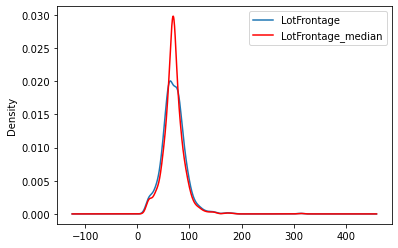

In [47]:
# let's evaluate the effect of median imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards the median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

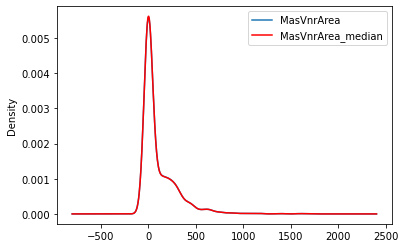

In [48]:
# For MasVnrArea, because the percentage of missing data
# was low, we don't expect and won't see a dramatic change in the
# original distribution of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['MasVnrArea_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

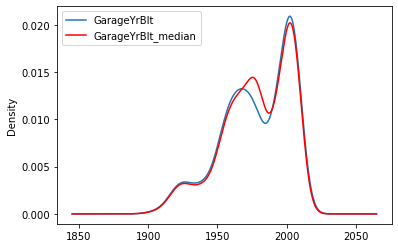

In [49]:
# similarly, for GarageBlt, because the percentage of missing data
# was low, we don't expect a massive change in the
# original distribution of the variable, however we see more values
# at around the median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['GarageYrBlt'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['GarageYrBlt_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [50]:
# similarly we can explore the effect of the imputation technique on 
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after median imputation: ', X_train['LotFrontage_median'].var())

Original Variance:  532.5872021885676
Variance after median imputation:  434.06604265416564


In [51]:
# this is not the case for MasnVnrArea, because the % of missing data was small
print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after median imputation: ', X_train['MasVnrArea_median'].var())

Original Variance:  32983.538710039466
Variance after median imputation:  32874.27007404175


In [52]:
# for GarageBlt, the % of missing data was small so the effect
# on the variance will also be small

print('Original Variance: ', X_train['GarageYrBlt'].var())
print('Variance after median imputation: ', X_train['GarageYrBlt_median'].var())

Original Variance:  624.3059475074134
Variance after median imputation:  591.3356883144767


In [53]:
# finally, let's explore the covariance:
# take your time to compare the values in the table below.
# see how the covariance is affected for LotFrontAge but not
# so much for the other 2 variables

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.744233e+02,28.095264
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,5.384774,1.005330e+02,16.875386
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,553.921303,3.298354e+04,1134.380889
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,788.095358,7.472110e+03,1724.141544
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2370.929189,2.465436e+04,2989.473391
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,2750.747094,2.080136e+04,1890.271636
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3189.685753,3.496714e+04,2576.345636
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,24.755173,1.182673e+03,624.305948
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,106.009105,3.212101e+03,627.624634
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,544838.836893,6.790442e+06,877485.418108


<AxesSubplot:>

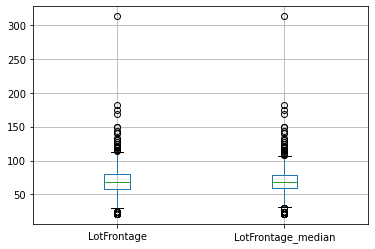

In [54]:
# Finally, let's explore the knock-on effect on outliers

# there is a decrease in the outlier boundaries for LotFrontage
# (look at the height of the top whisker)
# but not a visible effect for the other 2 variables

X_train[['LotFrontage', 'LotFrontage_median']].boxplot()

<AxesSubplot:>

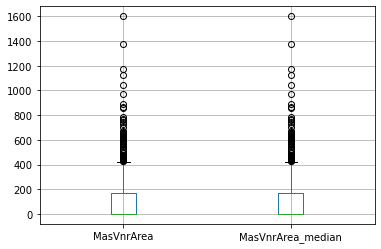

In [55]:
X_train[['MasVnrArea', 'MasVnrArea_median']].boxplot()

<AxesSubplot:>

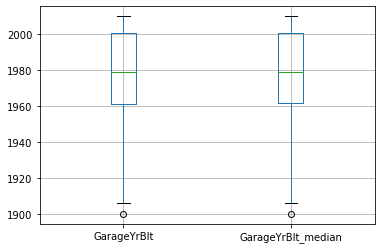

In [56]:
X_train[['GarageYrBlt', 'GarageYrBlt_median']].boxplot()

#### That is all for this demonstration.

Towards the end of this section, we will do mean / median imputation with open source Python packages, as part of a machine learning model pipeline.

# 1.3Arbitrary value imputation

Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value. Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).

#### Which variables can we impute with an arbitrary value?
Both categorical and numerical variables can be imputed by arbitrary values.

For categorical variables, this is the equivalent of replacing all instances of NA by an additional label, which is very common practice, so we will treat it separately in future below.

#### Assumptions
1. Data is not missing at random.
2. If this is the case, we want to flag the missing values with a different (arbitrary) value, instead of replacing those occurrences with the mean or the median, which represent the most common value.

#### Advantages
1. Easy to implement
2. Fast way of obtaining complete datasets
3. Can be integrated in production (during model deployment)
4. Captures the importance of "missingness" if there is one

#### Limitations
1. Distortion of the original variable distribution
2. Distortion of the original variance
3. Distortion of the covariance with the remaining variables of the dataset
4. If the arbitrary value is at the end of the distribution it may mask or create outliers
    Need to be careful not to chose an arbitrary value too similar to the mean or median (or any other common value of the variable distribution)
    
#### When to use arbitrary value imputation?
Replacing the NA by arbitrary values should be used when there are reasons to believe that the NA are not missing at random. In situations like this, we would not like to replace with the median or the mean, and therefore make the NA look like the majority of our observations. Instead, we want to flag the fact that the observation is missing.

This approach is used widely both in organisations and in Kaggle competitions. It consists of replacing the NA by an arbitrary value. 
The problem consists in deciding which arbitrary value to choose.

#### Final note
When variables are captured by third parties, like credit agencies, they place arbitrary numbers already to signal the fact that the value for that observation is missing. So arbitrary value imputation is also common practice in real life data collections.

In this demo:
We will perform arbitrary value imputation using pandas on the Ames House Price .

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

#### Imputation important
Imputation should be done over the training set, and then propagated to the test set. For arbitrary value imputation this is not so important, because we chose the value arbitrarily, however it is good to adhere to this practice and select the arbitrary value by looking only at the distribution of the variables in the train set.

In [60]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [61]:
# let's load the House Prices dataset

data = pd.read_csv('https://raw.githubusercontent.com/anash963/DataSets/master/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [62]:
# print the variables that contain missing data

# in the next list comprehension, I loop over all the columns 
# of the dataset and select those that contain missing data

[var for var in data.columns if data[var].isnull().sum()>0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [63]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [64]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

C:\Users\anash\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\anash\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\anash\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\anash\Anaconda3\lib\site-packages\pandas\plotting\_matpl

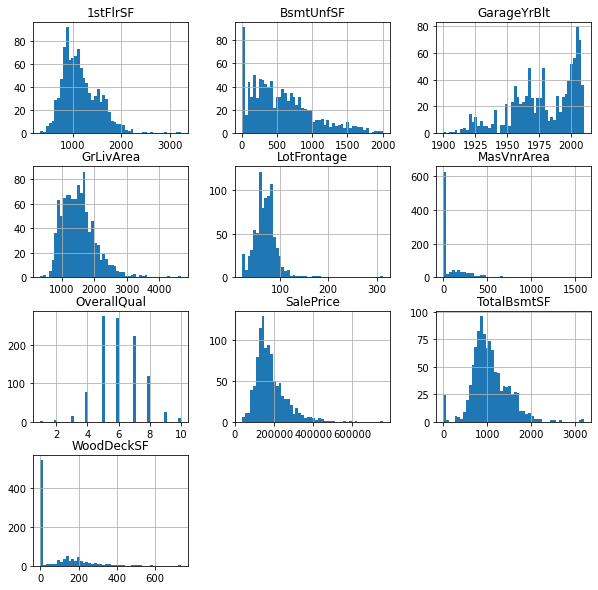

In [65]:
# let's plot the distributions of the variables
# we learnt this code in section 3 on variable characteristics

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [66]:
# Let's work with the variable LotFrontage first

# let's create a new variable with the missing values replaced by 999 using the function we created above

# in this case we chose 999 to place the value at the far right end of the
# distribution. As we can see from the hist above, LotFrontAge takes values
# up to 300

X_train.loc[:,'LotFrontage_imputed'] = impute_na(X_train, 'LotFrontage', 999)
X_test.loc[:,'LotFrontage_imputed'] = impute_na(X_test, 'LotFrontage', 999)

C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [67]:
# MasVnrArea takes values up to 1500, therefore, 999 will not
# work for this variable, as it is a normal value, I need to chose
# a bigger value: 2999

X_train.loc[:,'MasVnrArea_imputed'] = impute_na(X_train, 'MasVnrArea', 2999)
X_test.loc[:,'MasVnrArea_imputed'] = impute_na(X_test, 'MasVnrArea', 2999)

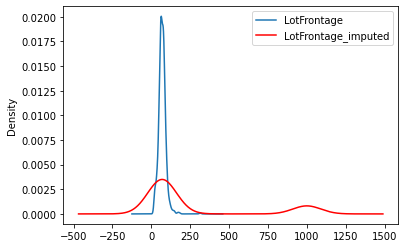

In [68]:
# let's evaluate the effect of arbitrary imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards 999

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable imputed with the 999
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

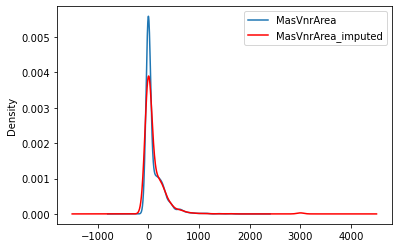

In [69]:
# For MasVnrArea, because the percentage of missing data
# was low, the change in the distribution is smaller

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable imputed with 2999
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

    From the above plots we can see that the distribution of LotFrontAge is changed quite dramatically, but not so much the distribution of MasVnrArea. This is because the % of missing values in the second variable is quite small. However, depending on the arbitrary value you choose to replace the NA, the distribution will be more or less affected.

We can try different numbers and compare the distributions......

Finally, you can see from the demo, that the process of selecting the arbitrary value is quite manual. We need to go variable per variable, observe the distribution and min / max values, to then select the arbitrary value. It works well for a few variables, but if our datasets contain hundreds or thousands, it becomes a bit inconvenient. An alternative for automation, is to place the values at the end of the distribution, as we will see in the next section of the notebook.

In [70]:
# similarly we can explore the effect of the imputation technique on 
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

# in fact the effect is quite dramatic

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  532.5872021885676
Variance after imputation:  130742.07296576179


In [71]:
# the same for MasnVnrArea, even though the % of NA is small, the
# arbitrary value is much bigger, which in turn affects the variance
# quite a bit

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after imputation: ', X_train['MasVnrArea_imputed'].var())

Original Variance:  32983.538710039466
Variance after imputation:  73677.02879932376


In [72]:
# finally, let's explore the covariance:
# take your time to compare the values in the table below.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,7.585010e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,-18.279174,1.140556e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,1582.711167,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-19005.620715,8.391605e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,1620.452017,2.503117e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,7485.021442,1.971276e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,9634.034363,3.694487e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,45.643154,1.588757e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,5377.154974,2.664993e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,950743.964420,7.152962e+06


#### In later sections we do arbitrary value imputation with scikit-learn and feature engine.

## 1.4End of distribution imputation
In the above we replaced missing data by an arbitrary value. However, determining the value of the arbitrary value can be laborious and it is usually a manual job. We can automate this process by automatically selecting arbitrary values at the end of the variable distributions.

#### How do we select the value at the end?
    If the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation
    If the variable is skewed, we can use the IQR proximity rule

   We can also select the min / max value and multiply it by a certain amount of times, like 2 or 3.

#### Which variables can we impute with an arbitrary value?
This method is suitable for numerical variables.

#### Assumptions
MNAR - values are not missing at random
If the value is not missing at random, we don't want to replace it for the mean / median and therefore make that observation look like the majority of our observations. Instead, we want to flag that observation as different, and therefore we assign a value that is at the tail of the distribution, where observations are rarely represented in the population.

#### Advantages
1. Easy to implement
2. Fast way of obtaining complete datasets
3. Can be integrated in production (during model deployment)
4. Captures the importance of "missingess" if there is one

#### Disadvantages
1. Distortion of the original variable distribution
2. Distortion of the original variance
3. Distortion of the covariance with the remaining variables of the dataset
4. This technique may mask true outliers in the distribution

#### Final note
I haven't seen this method used in data competitions, however, this method is used in finance companies. When capturing the financial history of customers, in order not to assume that missing is at random, the missing data are replaced by a value at the end of the distribution.

In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# to split the datasets
from sklearn.model_selection import train_test_split

In [74]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [75]:
# let's load the House Prices dataset

data = pd.read_csv('https://raw.githubusercontent.com/anash963/DataSets/master/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [76]:
# in the next list comprehension, I loop over all the columns 
# of the dataset and select those that contain missing data

[var for var in data.columns if data[var].isnull().sum()>0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [77]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [78]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

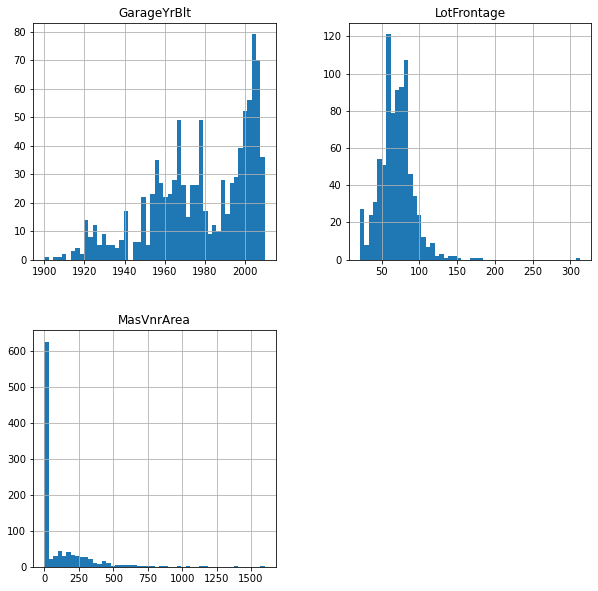

In [80]:
# let's plot the distributions of the variables

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].hist(bins=50, figsize=(10,10))
plt.show()

In [81]:
# the variables are not normally distributed

# let's impute the NA using the IQR proximity rule

# calulate the IQR
IQR = X_train['LotFrontage'].quantile(0.75) - X_train['LotFrontage'].quantile(
    0.25)

# calculate the upper boundary
extreme_value = X_train['LotFrontage'].quantile(0.75) + 3 * IQR

extreme_value

146.0

In [82]:
# let's impute the NA with the extreme value

X_train.loc[:,'LotFrontage_imputed'] = impute_na(X_train, 'LotFrontage', extreme_value)
X_test.loc[:,'LotFrontage_imputed'] = impute_na(X_test, 'LotFrontage', extreme_value)

C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [83]:
# let's do the same for MasVnrArea

# calculate the IQR
IQR = X_train['MasVnrArea'].quantile(0.75) - X_train['MasVnrArea'].quantile(
    0.25)

# calculate the upper boundary
extreme_value = X_train['MasVnrArea'].quantile(0.75) + 3 * IQR

extreme_value

680.0

In [84]:
# let's impute the NA with the extreme value

X_train.loc[:,'MasVnrArea_imputed'] = impute_na(X_train, 'MasVnrArea', extreme_value)
X_test.loc[:,'MasVnrArea_imputed'] = impute_na(X_test, 'MasVnrArea', extreme_value)

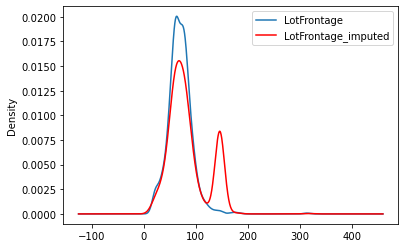

In [85]:
# let's evaluate the effect of end tail imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards the extreme value

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# imputed variable
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

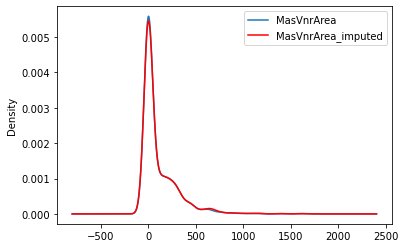

In [86]:
# let's evaluate the effect of arbitrary imputation on the distribution

# MasVnrArea had only few outliers, so the change in the distribution is
# not so dramatic. Less than when using an arbitrary value of 2999 as
# we did in the previous notebook

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# imputed variable
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

    From the above plots we can see that the distribution of LotFrontAge is changed quite dramatically, but not so much the distribution of MasVnrArea. This is because the % of missing values in the second variable is quite small.

<AxesSubplot:>

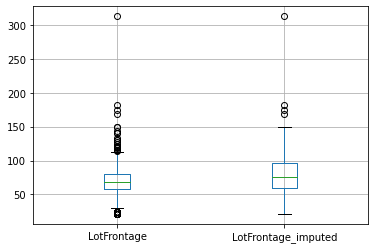

In [87]:
# we see that there are a fewer outliers as well after the imputation

X_train[['LotFrontage', 'LotFrontage_imputed']].boxplot()

<AxesSubplot:>

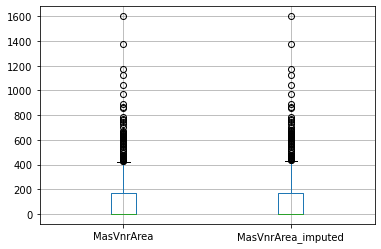

In [88]:
# however, the outliers are not so affected for MasVnrArea

X_train[['MasVnrArea', 'MasVnrArea_imputed']].boxplot()

In [89]:
# similarly we can explore the effect of the imputation technique on 
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  532.5872021885676
Variance after imputation:  1313.0936747097685


In [90]:
# the same for MasnVnrArea is not so big
# Note particularly, that this effect is smaller than the one we observed
# when imputing by 2999 in the previous notebook!!!

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after imputation: ', X_train['MasVnrArea_imputed'].var())

Original Variance:  32983.538710039466
Variance after imputation:  34441.33126074531


In [91]:
# finally, let's explore the covariance:
# take your time to compare the values in the table below.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.934872e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,3.425501,1.035991e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,639.100679,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-850.739199,7.680598e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2308.792907,2.473980e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,3142.724647,2.055453e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3723.250100,3.541558e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,26.484608,1.274750e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,542.437312,3.088048e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,578446.035624,6.872641e+06


## 1.5Frequent category imputation | Mode imputation

Mode imputation consists of replacing all occurrences of missing values (NA) within a variable by the mode, which in other words refers to the most frequent value or most frequent category.

#### Which variables can I impute with most frequent / mode Imputation?
Although the mode, or most frequent value can be calculated for both numerical and categorical variables, in practice, we only use this technique on categorical variables. The reason is that for numerical variables, the mean or the median tend to better represent the average value of the population.

#### Assumptions
    Data is missing completely at random (MCAR)
    The missing observations, most likely look like the majority of the observations in the variable (aka, the mode)
    The rationale is that the value that should have been seen for the missing observation is most likely the most frequent value or category of the variable.

#### Advantages
1. Easy to implement
2. Fast way of obtaining complete datasets
3. Can be integrated in production (during model deployment)

#### Limitations
1. Distortion the relation of the most frequent label with other variables within the dataset
2. May lead to an over-representation of the most frequent label if there is a big number of NA
3. When to use mode / most frequent category imputation?
4. Data is missing completely at random
5. No more than 5% of the variable contains missing data

In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [93]:
# let's load the dataset with a few columns for the demonstration

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('https://raw.githubusercontent.com/anash963/DataSets/master/houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [94]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

The variable BsmtQual contains only a few observations with NA (2.5), therefore, replacing those observations with the value of the most frequent category is a good approach.

On the other hand, the variable FireplaceQu, contains missing data in almost half of the observations. Therefore, replacing those with the most frequent category is most likely going to distort the relationship of the most frequent category with the sale price.

In addition, if so many observations in FireplaceQu are missing, it could be for a reason and not just at random, so we could be better off capturing that somehow with a different imputation technique. We will see how in the next section. For now, let's explore the effect of replacing NA by the most frequent categories when missing data is few or a lot.

In [95]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # target
    test_size=0.3, # percentage of observations in the test set
    random_state=0) # seed for reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [96]:
# let's remind ourselves of the % of missing values
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

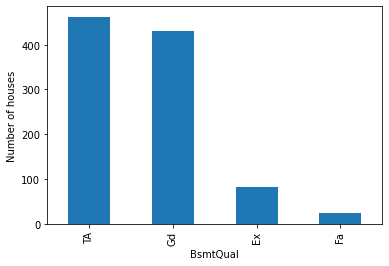

In [97]:
# let's inspect the number of observations per category in BsmtQual

# we used this line of code in section 3 on variable characteristics

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [98]:
# Let's find the most frequent category for BsmtQual

X_train['BsmtQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'BsmtQual')

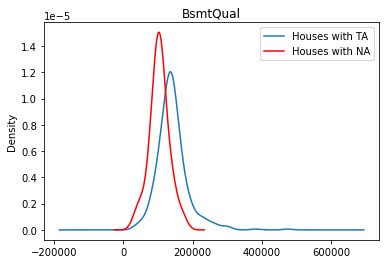

In [99]:
# let's plot the distribution of the target for the houses that:

# * show the most frequent category or
# * those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# select and plot houses with the most frequent label
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# select and plot houses with missing data in the variable
X_train[X_train['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('BsmtQual')

The plot above indicates that the houses with missing data cost overall less than those with the label TA. Therefore, replacing missing values by TA, could affect the overall distribution, if there were a lot of NA.

In [100]:
# let's keep the original distribution of SalePrice for the most
# frequent category for later

# the use of tmp is common to name temporal variables

tmp = X_train[X_train['BsmtQual']=='TA']['SalePrice']

In [101]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['BsmtQual'].fillna('TA', inplace=True)
X_test['BsmtQual'].fillna('TA', inplace=True)

C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [102]:
# check that NA have been filled

X_train['BsmtQual'].isnull().sum()

0

Text(0, 0.5, 'Number of houses')

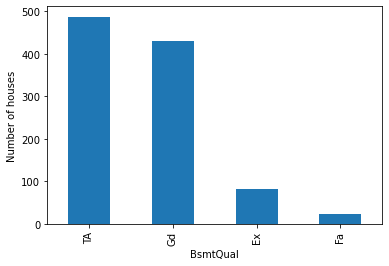

In [103]:
# evaluate effect on distribution of categories

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

    From the above plot, we see that now there are a few more houses with the label TA, which are those that before contained NA, but the overall effect on the distribution is not dramatic. The plot looks almost identical to that one before the imputation.

Text(0.5, 1.0, 'BsmtQual')

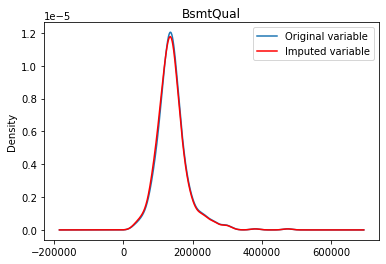

In [104]:
# did the distribution of SalePrice for the most frequent category change?
# let's have a look

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of salePrice for houses with most frequent label
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
X_train[X_train['BsmtQual'] == 'TA']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('BsmtQual')

The distribution of house prices between the original and imputed variable is quite similar, because the number of missing data was small. We expected this behaviour.

Let's explore the effect of mode imputation when the percentage of missing data is high.

#### FirePlaceQu

In [105]:
# let's remind ourselves of the % of missing values
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

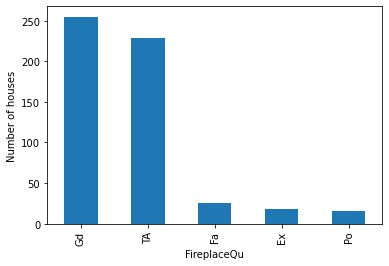

In [106]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [107]:
# Let's find the most frequent category for FirePlaceQu

X_train['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FirePlaceQu')

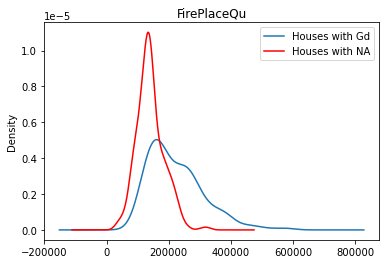

In [108]:
# let's plot the distribution of the target for the houses that
# show the most frequent category and those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# houses with the most frequent label for FirePlaceQu
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

# houses with missing data in FirePlaceQu
X_train[X_train['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

##### The distributions are quite different, houses with missing data cost overall less than those with the label Gd.

In [109]:
# let's keep the original distribution of SalePrice for houses
# that show Gd in FirePlaceQu, for later.

tmp = X_train[X_train['FireplaceQu']=='Gd']['SalePrice']

In [110]:
# Let's fill na in both train and test

X_train['FireplaceQu'].fillna('Gd', inplace=True)
X_test['FireplaceQu'].fillna('Gd', inplace=True)

C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Text(0, 0.5, 'Number of houses')

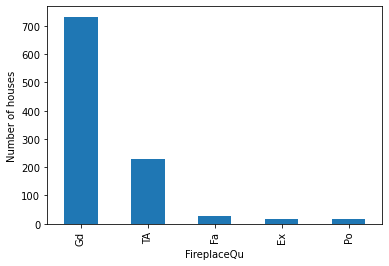

In [111]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

##### In this case, we see a big distortion in the original distribution of the variable. Now we have a lot more houses that contain the variable Gd, respect to the houses that show the other variables. Originally, half of the observartions in FirePlaceQu were missing. Now, all of those values contain Gd. That is why, we observe a big increase in Gd in the bar plot.

Text(0.5, 1.0, 'FirePlaceQu')

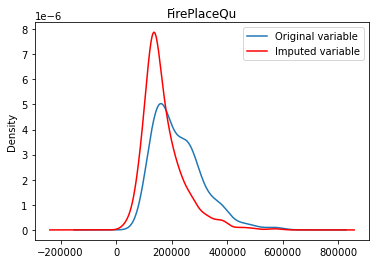

In [112]:
# let's plot the distribution of the target for the original variable
# fand the imputed variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of the variable
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
X_train[X_train['FireplaceQu'] == 'Gd']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

The average House value for the most frequent category has decreased quite dramatically after adding the house values of the NA, following re-categorisation of NA as the most frequent label.

Thus, the importance of this particular label for prediction of house price, is masked or changed by the addition of missing values.

In cases like this, when the percentage of missing values is so high (~50%) we are better off creating a new category to enclose the observations with NA.

## 1.6Arbitrary value imputation for categorical variables

    This is the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'.

This is in essence, the equivalent of replacing by an arbitrary value for numerical variables.

The beauty of this technique resides on the fact that it does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data is high.

#### Advantages
    Easy to implement
    Fast way of obtaining complete datasets
    Can be integrated in production (during model deployment)
    Captures the importance of "missingness" if there is one
    No assumption made on the data

#### Limitations
1. If the number of NA is small, creating an additional category may cause trees to over-fit


In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [115]:
# let's load the dataset with a few columns for the demonstration

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('https://raw.githubusercontent.com/anash963/DataSets/master/houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [116]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

When replacing NA in categorical variables by a label called 'Missing', we are not learning anything from the training set, so in principle we could do this in the original dataset and then separate into train and test. 
However, this practice is not recommended so shall continue to split the dataset in the beginning.

In [117]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [118]:
# let's remind ourselves of the % of missing values
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

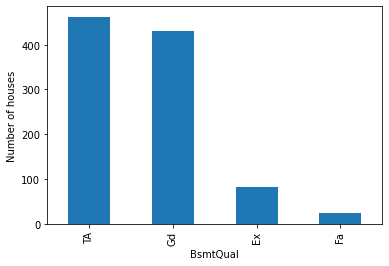

In [119]:
# let's inspect the number of observations per category in BsmtQual

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [120]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Text(0, 0.5, 'Number of houses')

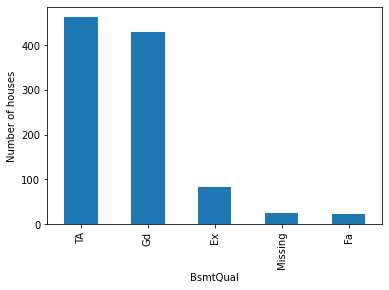

In [121]:
# let's plot the number of houses per category in the imputed variable

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

    We see now the additional category with the missing data: Missing

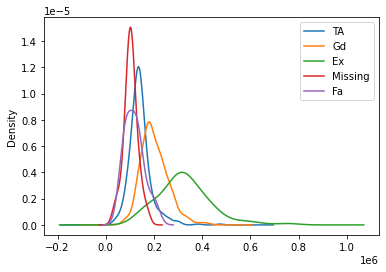

In [122]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

    You can see that the houses with different labels show different distributions of Prices. For example the houses with the label Ex tend to be the most expensive, whereas the houses that show Missing or Fa are the cheapest.

#### FirePlaceQu

In [123]:
# let's remind ourselves of the % of missing values
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

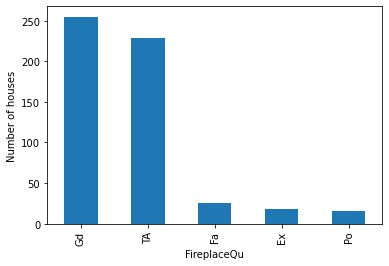

In [124]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [125]:
# Let's fill na in both train and test

X_train['FireplaceQu'].fillna('Missing', inplace=True)
X_test['FireplaceQu'].fillna('Missing', inplace=True)

C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Text(0, 0.5, 'Number of houses')

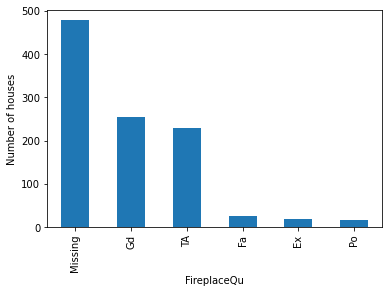

In [126]:
# let's inspect the number of observations per category
# in the imputed variable

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

    We see now the additional category with the missing data: Missing

    This label contains most of the houses, as most showed missing data originally.

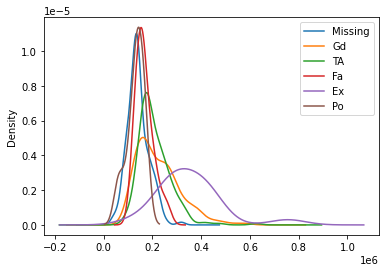

In [127]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Po']['SalePrice'].plot(kind='kde', ax=ax)


# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

    We observe again that the houses with different labels for FirePlaceQu also show different distributions of SalePrice, with those showing Ex being the most expensive ones and those showing Missing, or Fa being the cheapest ones.

In [128]:
# In case we need the plot for our analysis:
# here is a way of making it more general


def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()
        

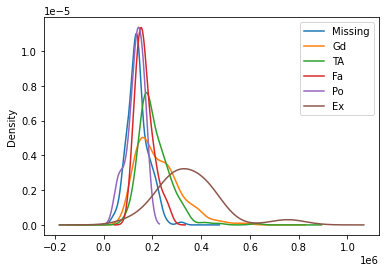

In [129]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

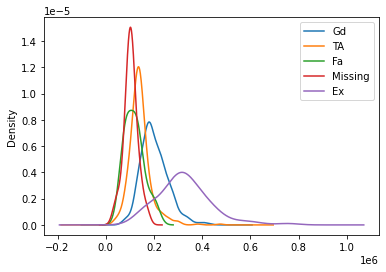

In [131]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')

## 1.7Random sample imputation
Random sampling imputation is in principle similar to mean / median / mode imputation, in the sense that it aims to preserve the statistical parameters of the original variable, for which data is missing.

Random sampling consist of taking a random observation from the pool of available observations of the variable, and using that randomly extracted value to fill the NA. In random sample imputation one takes as many random observations as missing values are present in the variable.

By random sampling observations of the variable for those instances where data is available, we guarantee that the mean and standard deviation of the variable are preserved.

By random sampling observations of the present categories, for categorical variables, we guarantee that the frequency of the different categories / labels within the variable is preserved.

#### Which variables can we impute by Random Sample Imputation?
Random Sample Imputation can be applied to both numerical and categorical variables.

#### Assumptions
Random sample imputation assumes that the data are missing completely at random (MCAR). If this is the case, it makes sense to substitute the missing values by values extracted from the original variable distribution.

From a probabilistic point of view, values that are more frequent, like the mean or the median or the most frequent category, for categorical variables, will be selected more often -because there are more of them to select from-, but other less frequent values will be selected as well. Thus, the variance and distribution of the variable are preserved.

The idea is to replace the population of missing values with a population of values with the same distribution of the original variable.

#### Advantages
Easy to implement
Fast way of obtaining complete datasets
Preserves the variance of the variable

#### Limitations
    Randomness
    The relationship of imputed variables with other variables may be affected if there are a lot of NA
    Memory heavy for deployment, as we need to store the original training set to extract values from and replace the NA in coming observations.
    
#### When to use Random Sample Imputation?
1. Data is missing completely at random
2. No more than 5% of the variable contains missing data
3. Well suited for linear models as it does not distort the distribution, regardless of the % of NA
4. If used in combination with a Missing Indicator, as we will see in the next lecture, then this method can be used when data is not missing at random as well, or when there are many missing observations.

#### Randomness
Randomness may not seem much of a concern when replacing missing values for data competitions, where the whole batch of missing values is replaced once and then the dataset is scored and that is the end of the problem. However, in business scenarios the situation is very different.

    Imagine for example a car manufacturer is trying to predict how long a certain car will be in the garage before it passes all the security tests. Today, they receive a car with missing data in some of the variables, they run the machine learning model to predict how long this car will stay in the garage, the model replaces missing values by a random sample of the variable and then produces an estimate of time. Tomorrow, when they run the same model on the same car, the model will randomly assign values to the missing data, that may or may not be the same as the ones it selected today, therefore, the final estimation of time in the garage, may or may not be the same as the one obtained the day before.

In addition, imagine the car manufacturer evaluates 2 different cars that have exactly the same values for all of the variables, and missing values in exactly the same subset of variables. They run the machine learning model for each car, and because the missing data is randomly filled with values, the 2 cars, that are exactly the same, may end up with different estimates of time in the garage.

        This may sound completely trivial and unimportant, however, businesses must follow a variety of regulations, and some of them require the same treatment to be provided to the same situation. So if instead of cars, these were people applying for a loan, or people seeking for disease treatment, the machine learning model would end up providing different solutions to candidates that are otherwise in the same conditions. And this is not fair or acceptable. This behaviour needs to be avoided.

#### So, should we randomly replace NA or not?
It is still possible to replace missing data by random sample, but these randomness needs to be controlled, so that individuals in the same situation end up with the same scores and therefore with the same solutions offered. How can we ensure this? by appropriately setting seeds during the random extraction of values.

Finally, another potential limitation of random sampling, similarly to replacing with the mean and median, is that estimates of covariance and correlations with other variables in the dataset may also be washed off by the randomness, particularly if there are a lot of missing observations.

#### Final note
Replacement of missing values by random sample, although similar in concept to replacement by the median or mean, is not as widely used in the data science community as the mean / median imputation, presumably because of the element of randomness, or because the code implementation is not so straightforward.

##### However, it is a valid approach, with clear advantages over mean / median imputation as it preserves the distribution of the variable. And if you are mindful of the element of randomness and account for it somehow, this may as well be your method of choice, particularly for linear models.


### Random Sampling for Categorical Variables

In [132]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split and standarise the datasets
from sklearn.model_selection import train_test_split

In [133]:
# let's load the dataset with a few columns for the demonstration
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('https://raw.githubusercontent.com/anash963/DataSets/master/houseprice.csv', usecols=cols_to_use)

# let's inspect the percentage of missing values in each variable
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
FireplaceQu    0.472603
dtype: float64

In [134]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data.SalePrice,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [135]:
# let's impute BsmtQual by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train['BsmtQual_imputed'] = X_train['BsmtQual'].copy()
X_test['BsmtQual_imputed'] = X_test['BsmtQual'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['BsmtQual'].dropna().sample(
    X_train['BsmtQual'].isnull().sum(), random_state=0)

random_sample_test = X_train['BsmtQual'].dropna().sample(
    X_test['BsmtQual'].isnull().sum(), random_state=0)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that we will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['BsmtQual'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['BsmtQual'].isnull()].index
random_sample_test.index = X_test[X_test['BsmtQual'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_train
X_test.loc[X_test['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_test

C:\Users\anash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\anash\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

In [136]:
# let's impute FireplaceQu by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu'].copy()
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['FireplaceQu'].dropna().sample(
    X_train['FireplaceQu'].isnull().sum(), random_state=0)

random_sample_test = X_train['FireplaceQu'].dropna().sample(
    X_test['FireplaceQu'].isnull().sum(), random_state=0)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['FireplaceQu'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['FireplaceQu'].isnull()].index
random_sample_test.index = X_test[X_test['FireplaceQu'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_train
X_test.loc[X_test['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_test

C:\Users\anash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [137]:
# check that nulls were removed
X_train['FireplaceQu_imputed'].isnull().sum()

0

In [138]:
# and now let's evaluate the effect of the imputation on the distribution
# of the categories and the target within those categories

# we used a similar function in the notebook of arbitrary value imputation
# for categorical variables

def categorical_distribution(df, variable_original, variable_imputed):

    tmp = pd.concat(
        [
            # percentage of observations per category, original variable
            df[variable_original].value_counts() / len(df[variable_original].dropna()),

            # percentage of observations per category, imputed variable
            df[variable_imputed].value_counts() / len(df)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'imputed']

    return tmp

In [139]:
# run the function in a categorical variable
categorical_distribution(X_train, 'BsmtQual', 'BsmtQual_imputed')

,original,imputed
TA,0.463928,0.465753
Gd,0.430862,0.428571
Ex,0.082164,0.083170
Fa,0.023046,0.022505


In [140]:
# run the function in a categorical variable
categorical_distribution(X_train, 'FireplaceQu', 'FireplaceQu_imputed')

,original,imputed
Gd,0.468750,0.469667
TA,0.420956,0.420744
Fa,0.047794,0.046967
Ex,0.033088,0.032290
Po,0.029412,0.030333


As expected, the percentage of observations within each category is very similar in the original and imputed variables, for both BsmtQual where NA are low and FireplaceQu were NA are high.

In [141]:
# now let's look at the distribution of the target within each
# variable category

def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].dropna().unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].dropna().unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()

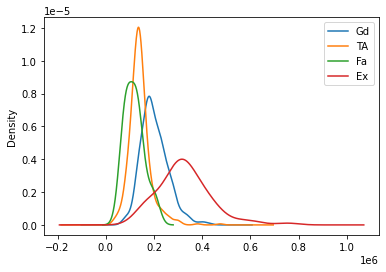

In [142]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')

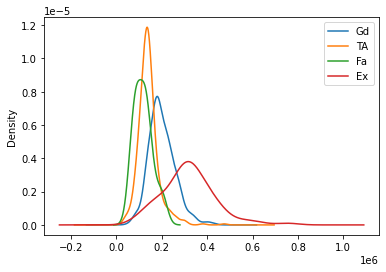

In [143]:
automate_plot(X_train, 'BsmtQual_imputed', 'SalePrice')

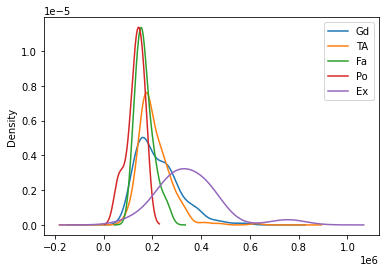

In [144]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

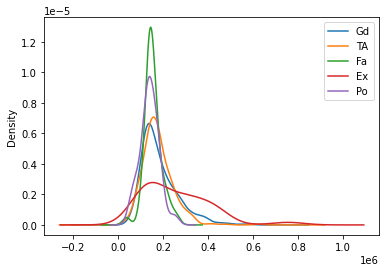

In [145]:
automate_plot(X_train, 'FireplaceQu_imputed', 'SalePrice')

For BsmtQual, where the NA are low, the distribution of the target is preserved for the categories in the original and imputed variable. However, for FireplaceQu, which contains more NAs, the distribution of the target per category is affected slightly.

#### Note on Random Sample Imputation code
The code provided in this notebook for random sampling, is a bit complex. but we can do random sample imputation using the package feature engine in just a couple of lines. 

## 1.8Missing-Indicator-Imputation

### Adding a variable to capture NA
Above we replaced missing values by the mean, median or by extracting a random value. In other words we learnt about mean / median and random sample imputation. These methods assume that the data are missing completely at random (MCAR).

There are other methods that can be used when values are not missing at random, for example arbitrary value imputation or end of distribution imputation. However, these imputation techniques will affect the variable distribution dramatically, and are therefore not suitable for linear models.

So what can we do if data are not MCAR and we want to use linear models?

If data are not missing at random, it is a good idea to replace missing observations by the mean / median / mode AND flag those missing observations as well with a Missing Indicator. A Missing Indicator is an additional binary variable, which indicates whether the data was missing for an observation (1) or not (0).

#### For which variables can I add a missing indicator?
We can add a missing indicator to both numerical and categorical variables.

#### Note
    Adding a missing indicator is never used alone. On the contrary, it is always used together with another imputation technique, which can be mean / median imputation for numerical variables, or frequent category imputation for categorical variables. We can also use random sample imputation together with adding a missing indicator for both categorical and numerical variables.

#### Commonly used together:

1. Mean / median imputation + missing indicator (Numerical variables)
2. Frequent category imputation + missing indicator (Categorical variables)
3. Random sample Imputation + missing indicator (Numerical and categorical)

#### Assumptions
1. Data is not missing at random
2. Missing data are predictive

#### Advantages
    Easy to implement
    Captures the importance of missing data if there is one

#### Limitations
1. Expands the feature space
2. Original variable still needs to be imputed to remove the NaN
3. Adding a missing indicator will increase 1 variable per variable in the dataset with missing values. So if the dataset contains 10 features, and all of them have missing values, after adding a missing indicator we will have a dataset with 20 features: the original 10 features plus additional 10 binary features, which indicate for each of the original variables whether the value was missing or not. This may not be a problem in datasets with tens to a few hundreds variables, but if our original dataset contains thousands of variables, by creating an additional variable to indicate NA, we will end up with very big datasets.

#### Important
In addition, data tends to be missing for the same observation across multiple variables, which often leads to many of the missing indicator variables to be actually similar or identical to each other.

#### Final note
Typically, mean / median / mode imputation is done together with adding a variable to capture those observations where the data was missing, thus covering 2 angles: if the data was missing completely at random, this would be contemplated by the mean / median / mode imputation, and if it wasn't this would be captured by the missing indicator.

Both methods are extremely straight forward to implement, and therefore are a top choice in data science competitions.


In [146]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [147]:
# we are going to use the following variables,
# some are categorical some are numerical

cols_to_use = [
    'LotFrontage', 'MasVnrArea', # numerical
    'BsmtQual', 'FireplaceQu', # categorical
    'SalePrice' # target
]

In [149]:
# let's load the House Prices dataset

data = pd.read_csv('https://raw.githubusercontent.com/anash963/DataSets/master/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 5)


,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,SalePrice
0,65.0,196.0,Gd,NaN,208500
1,80.0,0.0,Gd,TA,181500
2,68.0,162.0,Gd,TA,223500
3,60.0,0.0,TA,Gd,140000
4,84.0,350.0,Gd,TA,250000


In [150]:
# let's inspect the variables with missing values

data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [151]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [152]:
# let's make a function to add a missing indicator
# binary variable

def missing_indicator(df, variable):    
    return np.where(df[variable].isnull(), 1, 0)

In [153]:
# let's loop over all the variables and add a binary 
# missing indicator with the function we created

for variable in cols_to_use:
    X_train[variable+'_NA'] = missing_indicator(X_train, variable)
    X_test[variable+'_NA'] = missing_indicator(X_test, variable)
    
X_train.head()

C:\Users\anash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\anash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,SalePrice,LotFrontage_NA,MasVnrArea_NA,BsmtQual_NA,FireplaceQu_NA,SalePrice_NA
64,NaN,573.0,Gd,NaN,219500,1,0,0,1,0
682,NaN,0.0,Gd,Gd,173000,1,0,0,0,0
960,50.0,0.0,TA,NaN,116500,0,0,0,1,0
1384,60.0,0.0,TA,NaN,105000,0,0,0,1,0
1100,60.0,0.0,TA,NaN,60000,0,0,0,1,0


In [154]:
# now let's evaluate the mean value of the missing indicators

# first I capture the missing indicator variables with a 
# list comprehension
missing_ind = [col for col in X_train.columns if 'NA' in col]

# calculate the mean
X_train[missing_ind].mean()

LotFrontage_NA    0.184932
MasVnrArea_NA     0.004892
BsmtQual_NA       0.023483
FireplaceQu_NA    0.467710
SalePrice_NA      0.000000
dtype: float64

In [155]:
# the mean of the missing indicator
# coincides with the percentage of missing values
# in the original variable

X_train.isnull().mean()

LotFrontage       0.184932
MasVnrArea        0.004892
BsmtQual          0.023483
FireplaceQu       0.467710
SalePrice         0.000000
LotFrontage_NA    0.000000
MasVnrArea_NA     0.000000
BsmtQual_NA       0.000000
FireplaceQu_NA    0.000000
SalePrice_NA      0.000000
dtype: float64

In [156]:
# let's make a function to fill missing values with a value:
# we have use a similar function in our previous notebooks
# so you are probably familiar with it

def impute_na(df, variable, value):
    return df[variable].fillna(value)

In [157]:
# let's impute the NA with  the median for numerical
# variables
# remember that we calculate the median using the train set

median = X_train['LotFrontage'].median()
X_train['LotFrontage'] = impute_na(X_train, 'LotFrontage', median)
X_test['LotFrontage'] = impute_na(X_test, 'LotFrontage', median)

median = X_train['MasVnrArea'].median()
X_train['MasVnrArea'] = impute_na(X_train, 'MasVnrArea', median)
X_test['MasVnrArea'] = impute_na(X_test, 'MasVnrArea', median)


# let's impute the NA in categorical variables by the 
# most frequent category (aka the mode)
# the mode needs to be learnt from the train set

mode = X_train['BsmtQual'].mode()[0]
X_train['BsmtQual'] = impute_na(X_train, 'BsmtQual', mode)
X_test['BsmtQual'] = impute_na(X_test, 'BsmtQual', mode)

mode = X_train['FireplaceQu'].mode()[0]
X_train['FireplaceQu'] = impute_na(X_train, 'FireplaceQu', mode)
X_test['FireplaceQu'] = impute_na(X_test, 'FireplaceQu', mode)

C:\Users\anash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\anash\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [158]:
# and now let's check there are no more NA
X_train.isnull().mean()

LotFrontage       0.0
MasVnrArea        0.0
BsmtQual          0.0
FireplaceQu       0.0
SalePrice         0.0
LotFrontage_NA    0.0
MasVnrArea_NA     0.0
BsmtQual_NA       0.0
FireplaceQu_NA    0.0
SalePrice_NA      0.0
dtype: float64

#### As you can see, we have now the double of features respect to the original dataset. The original dataset had 4 variables, the pre-processed dataset contains 8, plus the target.
